In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [211]:
df = pd.read_csv("train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [212]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [213]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"dtybe":dtypes,"num_unoqe":n_uniq}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
dtybe,int64,int64,object,float64,int64,int64,float64,object,object
num_unoqe,2,3,2,88,7,7,248,147,3


In [214]:
def chk_types(data):
    dtypes = df.dtypes
    n_uniq = df.nunique()

    return pd.DataFrame({"Dtype":dtypes, "Num_Unige":n_uniq} ).T

In [215]:
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,object,float64,int64,int64,float64,object,object
Num_Unige,2,3,2,88,7,7,248,147,3


In [216]:
cols =['Pclass','Survived','Sex','SibSp','Parch','Embarked']
df[cols] =df[cols].astype('category')

In [217]:
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,category,category,category,float64,category,category,float64,object,category
Num_Unige,2,3,2,88,7,7,248,147,3


In [218]:
df.shape[0]


891

In [219]:
null = df.isnull().sum()
ratio =(null/df.shape[0])*100
pd.DataFrame({"Null":null, "ratio %":ratio} ).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
ratio %,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [220]:
def check_null(data):

    null = data.isnull().sum()
    ratio =(null/df.shape[0])*100
    return pd.DataFrame({"Null":null, "ratio %":ratio} ).T

In [221]:
madian_1 = df['Age'].median()
df['Age'].fillna(madian_1 ,inplace=True)
pd.DataFrame({"Null":null, "ratio %":ratio} ).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
ratio %,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [222]:
df.dropna(subset=['Embarked'], inplace= True)
df = df.drop("Cabin",axis=1)

In [223]:
null = df.isnull().sum()
ratio = (null/ df.shape[0])*100
pd.DataFrame({"Null":null, "ratio % ":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ratio %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


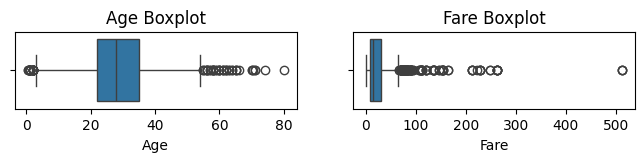

In [224]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i ,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col],orient="h")
    plt.title(f"{col} Boxplot")

In [225]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR

    df.loc[df[col] < Lower_Fence, col] = Lower_Fence
    df.loc[df[col] > Upper_Fence, col] = Upper_Fence


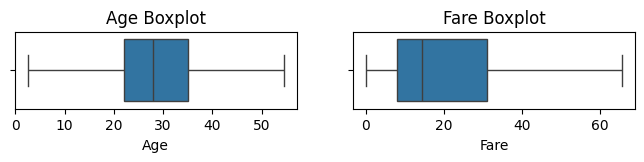

In [226]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i ,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col],orient="h")
    plt.title(f"{col} Boxplot")

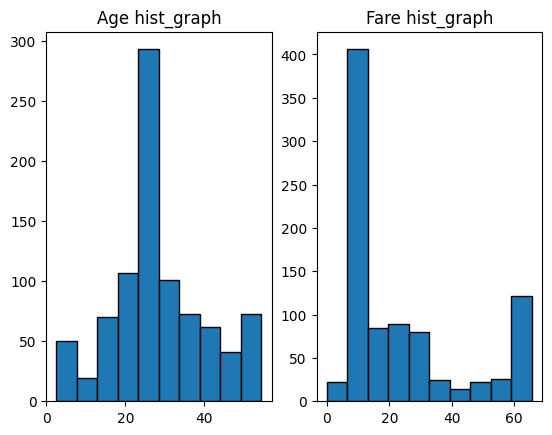

In [227]:
num_cols = df.select_dtypes('number').columns
plt.Figure(figsize=(9,2))
for i ,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    plt.hist(df[col],edgecolor = "black")
    plt.title(f"{col} hist_graph")

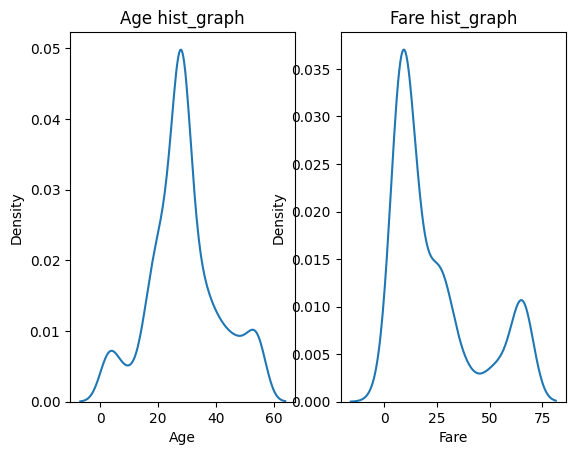

In [228]:
num_cols = df.select_dtypes('number').columns
plt.Figure(figsize=(9,2))
for i ,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.kdeplot(df[col])
    plt.title(f"{col} hist_graph")

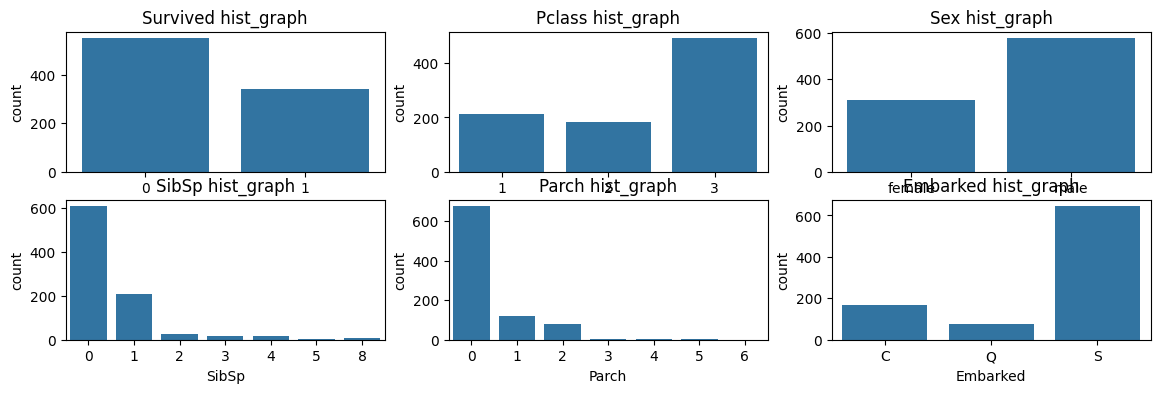

In [229]:
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(14,4))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = col, data = df)
    plt.title(f"{col} hist_graph")
plt.show()

In [230]:
unique =df['Pclass'].value_counts()
count = unique.values
print(unique,count)

Pclass
3    491
1    214
2    184
Name: count, dtype: int64 [491 214 184]


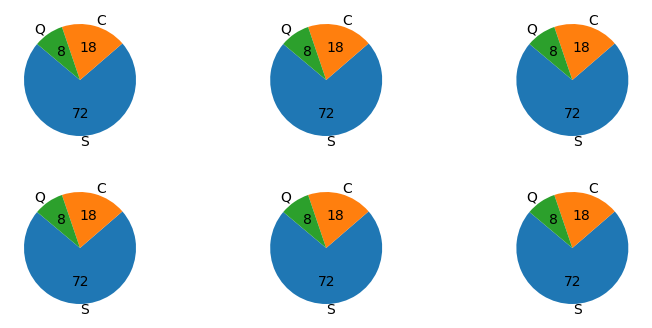

In [231]:
cat_cols = df.select_dtypes("category").columns
plt.figure(figsize=(9,4))
for i , cols in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    unique =df[col].value_counts()
    count = unique.values
    categories =unique.index
    plt.pie(count,labels=categories,startangle=140,autopct='%1.1d')

    

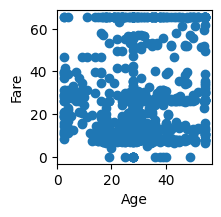

In [232]:
plt.figure(figsize=(2,2))
plt.scatter(df['Age'],df['Fare'])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

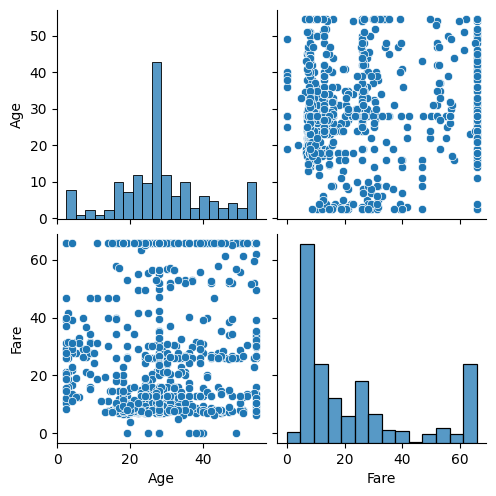

In [233]:
sns.pairplot(df)

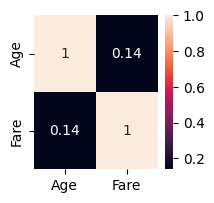

In [234]:
corr =df[num_cols].corr()
plt.figure(figsize=(2,2))
sns.heatmap(corr,annot=True)
plt.show()

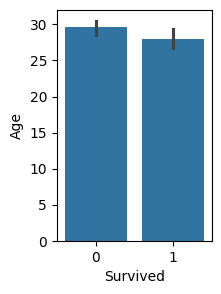

In [235]:
plt.figure(figsize=(2,3))
sns.barplot(x="Survived",y="Age",data = df)
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

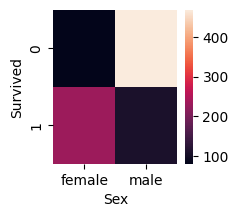

In [236]:
plt.figure(figsize=(2,2))
agg = df.pivot_table(index="Survived", columns="Sex", values="Age", aggfunc=len)
sns.heatmap(agg)

In [237]:
X = df.drop("Survived", axis = 1)
y = df [ ["Survived"] ]

In [238]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,65.6563,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [239]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [240]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols = X.select_dtypes("number").columns
X[num_cols] = scaler.fit_transform(X[num_cols])

X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.375000,1,0,0.110424,S
1,1,female,0.682692,1,0,1.000000,C
2,3,female,0.451923,0,0,0.120704,S
3,1,female,0.625000,1,0,0.808757,S
4,3,male,0.625000,0,0,0.122608,S
...,...,...,...,...,...,...,...
886,2,male,0.471154,0,0,0.198001,S
887,1,female,0.317308,0,0,0.456925,S
888,3,female,0.490385,1,2,0.357163,S
889,1,male,0.451923,0,0,0.456925,C


In [241]:
str_cols = ['Sex','Embarked']

In [242]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols =str_cols,drop_invariant=True)
X =encoder.fit_transform(X)
X

,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,3,1,0,0.375000,1,0,0.110424,1,0,0
1,1,0,1,0.682692,1,0,1.000000,0,1,0
2,3,0,1,0.451923,0,0,0.120704,1,0,0
3,1,0,1,0.625000,1,0,0.808757,1,0,0
4,3,1,0,0.625000,0,0,0.122608,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,0,0.471154,0,0,0.198001,1,0,0
887,1,0,1,0.317308,0,0,0.456925,1,0,0
888,3,0,1,0.490385,1,2,0.357163,1,0,0
889,1,1,0,0.451923,0,0,0.456925,0,1,0


In [243]:
df2 =pd.read_csv("insurance.csv")
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [244]:
dtype =df2.dtypes
n_nuniq =df2.nunique()
pd.DataFrame({"dtypes":dtype,"Nunique":n_nuniq}).T


,age,sex,bmi,children,smoker,region,charges
dtypes,int64,object,float64,int64,object,object,float64
Nunique,47,2,548,6,2,4,1337


In [245]:
cat_cols = ['sex', 'children', 'smoker', 'region']
df2[cat_cols] = df2[cat_cols].astype("category")



In [246]:
pd.DataFrame(df2.dtypes).T


,age,sex,bmi,children,smoker,region,charges
0,int64,category,float64,category,category,category,float64


In [247]:
pd.DataFrame(df.isnull().sum()).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,0,0,0,0,0,0


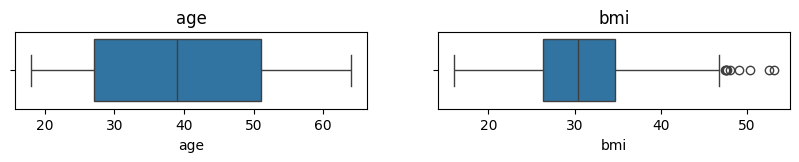

In [248]:
num_cols = ['age' , 'bmi' ]
plt.figure(figsize=(10,1))
for i, col in enumerate(num_cols):
    plt.subplot(1, 2,i+1)
    plt.title(f"{col}")
    sns.boxplot(df2[col], orient='h')
plt.show()

In [249]:
Q1 = df2.bmi.quantile(0.25)
Q3 = df2.bmi.quantile(.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
outliers = df2[df2.bmi>upper].bmi.values
df2.bmi.replace(outliers,upper,inplace=True)

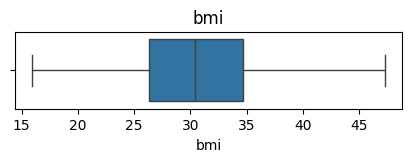

In [250]:
plt.figure(figsize=(5,1))
plt.title("bmi")
sns.boxplot(df2.bmi,orient='h')
plt.show()

In [251]:
num_cols = ['age','bmi']
cat_cols = ['sex','children','smoker','region']


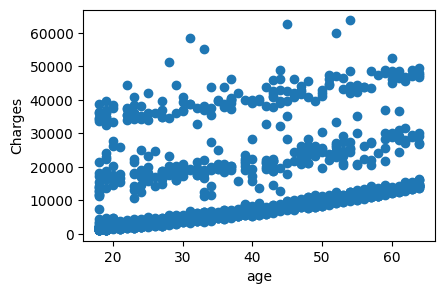

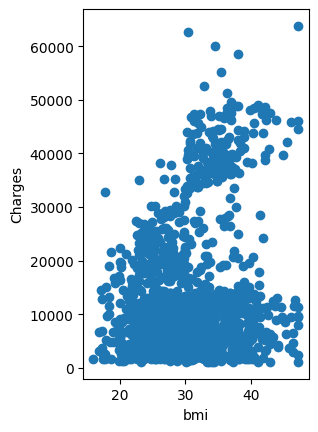

In [252]:
plt.figure(figsize=(10,3))
for i,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    plt.xlabel(f"{col}")
    plt.ylabel(f"Charges")
    plt.scatter(df2[col],df2.charges)
    plt.show()

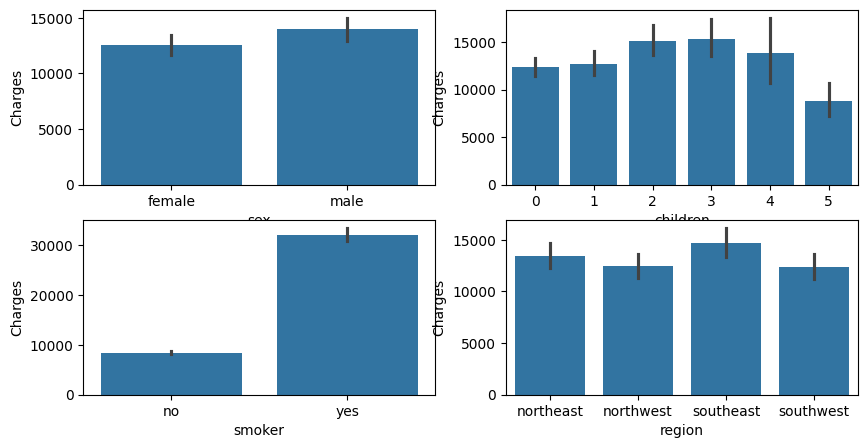

In [253]:
plt.figure(figsize=(10,5))
for i,col in enumerate(cat_cols):
    plt.subplot(2 ,2 , i+1)
    plt.xlabel(f"{col}")
    plt.ylabel(f"Charges")
    sns.barplot(x = col ,y ="charges", data=df2)
plt.show()


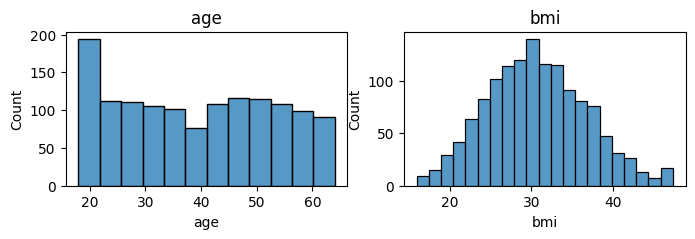

In [254]:
plt.figure(figsize=(8,2))
for i,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    plt.title(f"{col}")
    sns.histplot(x=col, data= df2)
plt.show()

In [255]:
x = df.iloc[ : , :- 1]
y = df. iloc[ : , -1:]

In [256]:
from sklearn.preprocessing import MinMaxScaler
cols_to_norm = X.select_dtypes("number").columns
scaler = MinMaxScaler()
 

In [257]:
X[cols_to_norm] = scaler.fit_transform(X[cols_to_norm])